# Coursework 2 - Part 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 1.1: Reporting number of COVID-19 cases in each London local authority  (2 marks)
First, read the “cases.csv” dataset into a dataframe. Create a new dataframe where rows are the unique names of London local authorities and the columns are the total number of covid cases in each London local authority (include both count columns in the starting dataframe).

In [3]:
df1=pd.read_csv('cases.csv',header=0)

In [27]:
# Assuming that each geographical location has roughly the same population
cases=df1[df1.columns[2:]].set_index('Local authority').sum(axis=0,level='Local authority')
cases

,covid_19_deaths,covid_19_deaths_per_thousand
Local authority,,
City of London,3,0.344590
Barking and Dagenham,103,11.033706
Barnet,287,30.158932
Bexley,125,14.651414
Brent,304,31.098513
Bromley,152,17.852618
Camden,91,9.419626
Croydon,252,28.841783
Ealing,239,27.590435


### 1.2: Calculating percentage of COVID-19 cases in each London local authority (2 marks)
Read the “population.csv” dataset and calculate the percentage of covid cases in each city of London region according to the total population and add it as a new column to the datafame. Sort the dataframe according to this column.


In [35]:
df2=pd.read_csv('population.csv',header=0)
# Calculate the total population in each city of London region from df2
pop=df2[df2.columns[2:4]].set_index('Local authority').sum(axis=0, level='Local authority')
cases['case_rate']=cases['covid_19_deaths']/pop['total_population_mid_2018']*100

In [37]:
cases = cases.sort_values(by=['case_rate'])
cases

,covid_19_deaths,covid_19_deaths_per_thousand,case_rate
Local authority,,,
Kingston upon Thames,57,6.737526,0.032484
City of London,3,0.344590,0.034459
Camden,91,9.419626,0.034703
Islington,88,8.565254,0.036798
Richmond upon Thames,77,9.479668,0.039105
Wandsworth,132,15.180754,0.040432
Tower Hamlets,132,13.547523,0.041548
Hounslow,120,12.310915,0.044316
Bromley,152,17.852618,0.045908


### 1.3: Finding the largest and smallest population based on ethnicity group in each city of London (3 marks)

Read the “ethnic.csv” dataset and calculate the population of different ethnicity groups in each London borough using column “total\_population\_mid\_2018” from the first dataset “cases.csv”. Plot a bar chart to compare cases in each ethnicity group for each London local authority.

In [12]:
df3=pd.read_csv('ethnic.csv',header=0)

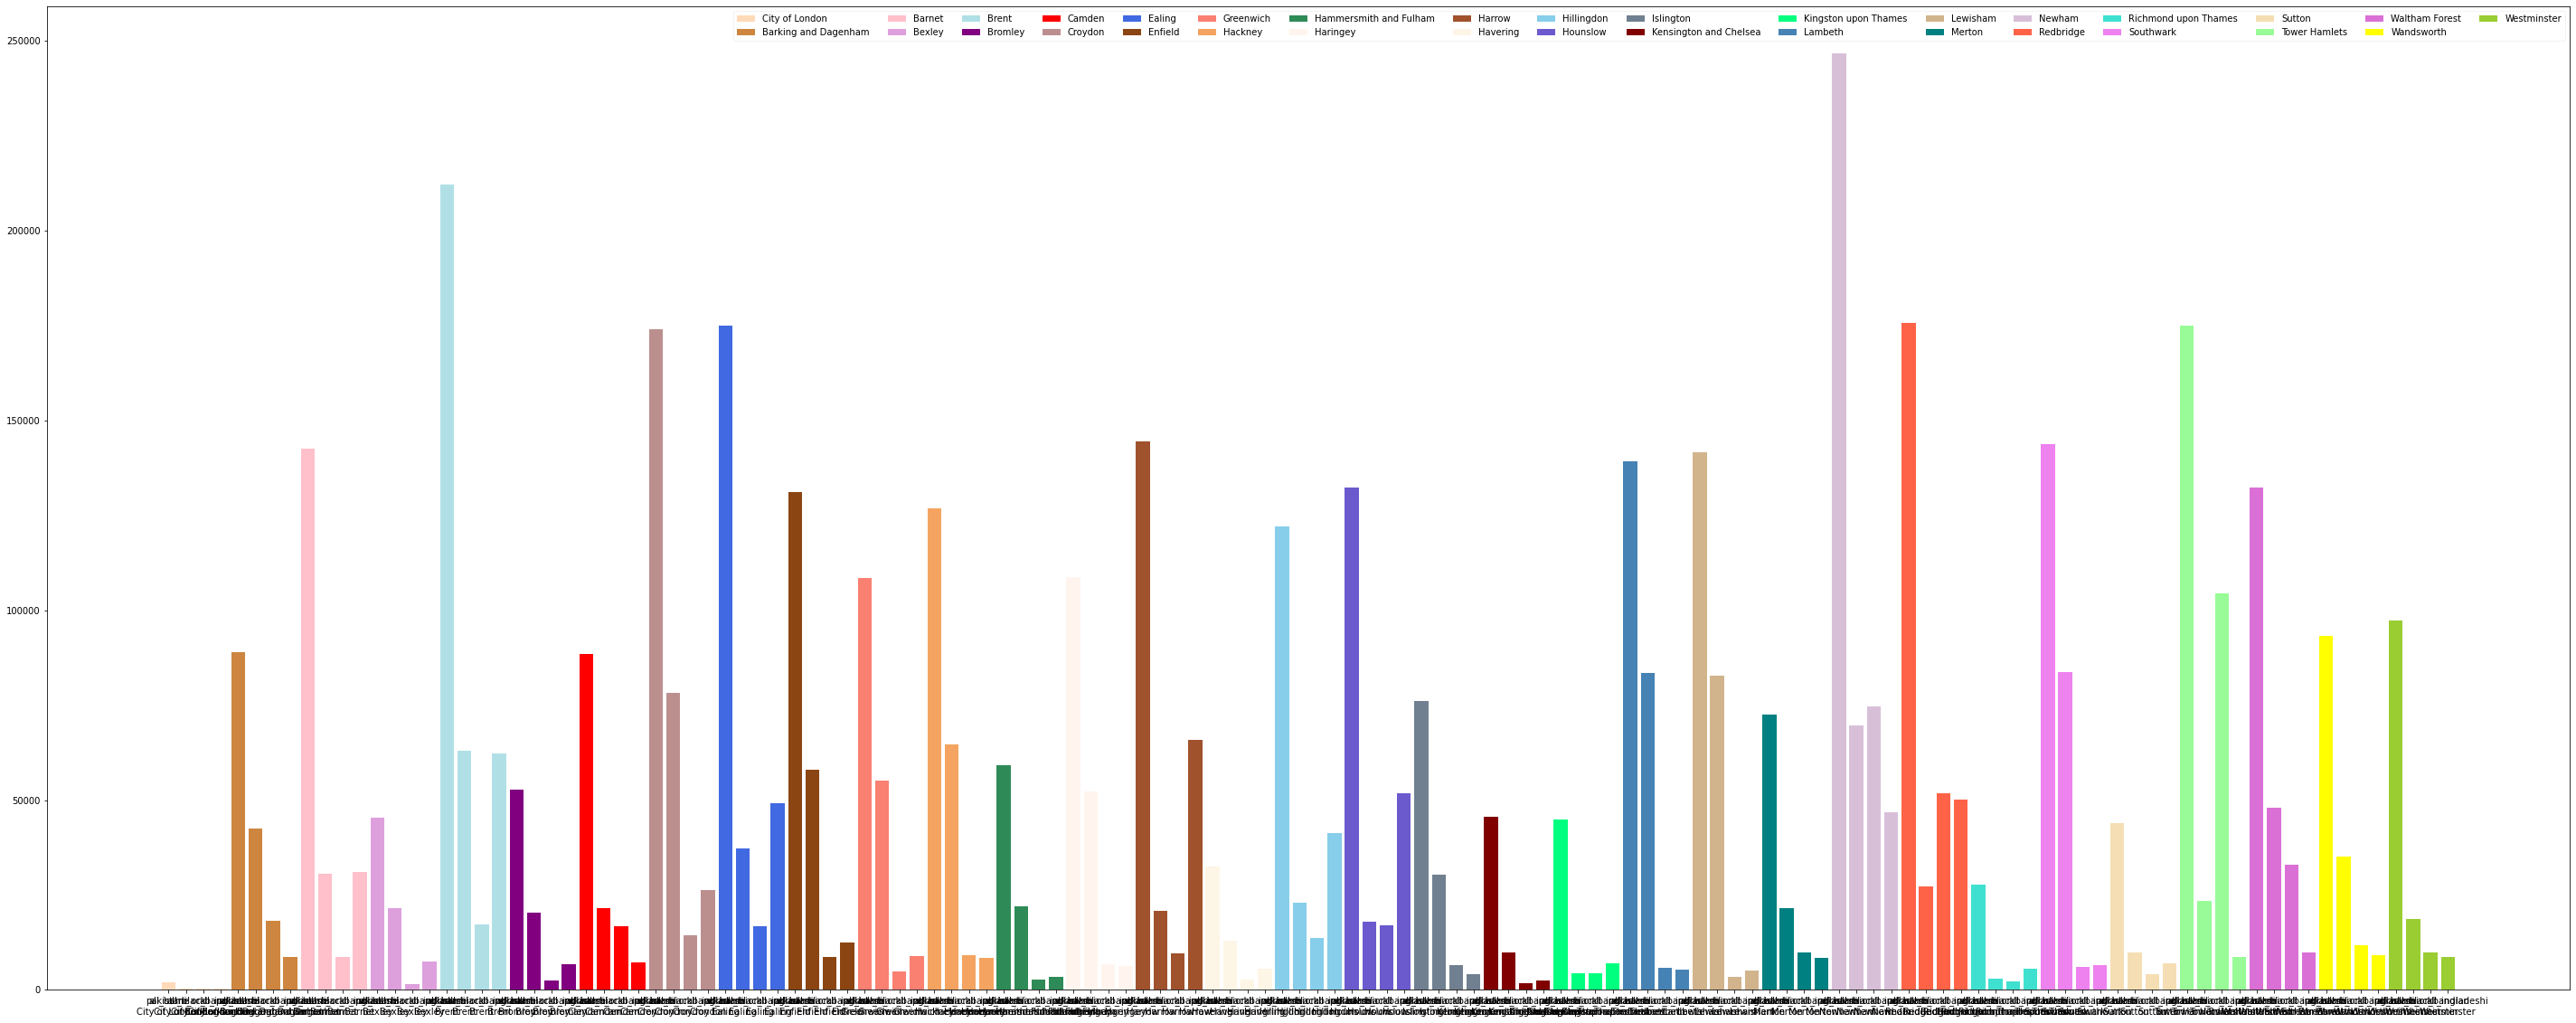

In [42]:
df3['all_bame']=df3['all_bame_prop']*df2['total_population_mid_2018']
df3['all_black']=df3['all_black_prop']*df2['total_population_mid_2018']
df3['pakistani_or_bangladeshi']=df3['pakistani_or_bangladeshi_prop']*df2['total_population_mid_2018']
df3['all_indian']=df3['all_indian_prop']*df2['total_population_mid_2018']
ethnic=df3[['Local Authority','all_bame','all_black','pakistani_or_bangladeshi','all_indian']].set_index('Local Authority').sum(axis=0,level='Local Authority')
color=['peachpuff','peru','pink','plum','powderblue','purple','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown','seagreen','seashell','sienna','oldlace','skyblue','slateblue','slategray','maroon','springgreen','steelblue','tan','teal','thistle','tomato','turquoise','violet','wheat','palegreen','orchid','yellow','yellowgreen']
fig = plt.figure(figsize=(50,20))
ax=plt.subplot(111)
for i in range(len(ethnic.index)):
     ax.bar(ethnic.columns[:]+'\n'+ethnic.index[i],ethnic.iloc[i,:],color=color[i])
ax.legend(ethnic.index,loc='best',ncol=17,framealpha=200)

### 1-4: Analysing the medical conditions of each region (3 marks)
Read the “medical.csv” dataset. Calculate total percentage of patients with “Hypertension”, “Obesity (18+)”, “Diabetes”, “Asthma”, and “Coronary heart disease” for each London local authority. For each medical condition, draw a boxplot of medical case frequencies for the 5 regions with the highest "total\_registered\_patient". Then, add a new column to the daraframe from section 1.2 to show the medical conditions with the highest number patients in each London borough.  

In [19]:
df4=pd.read_csv('medical.csv',header=0)

In [20]:
#calculate the number of patients for each medical condition in each local region, then sum up the total number for each local authority
df4['Hypertension_num']=df4['Hypertension']/100*df4['total_registered_patients']
df4['Obesity (18+)_num']=df4['Obesity (18+)']/100*df4['total_registered_patients']
df4['Diabetes_num']=df4['Diabetes']/100*df4['total_registered_patients']
df4['Asthma_num']=df4['Asthma']/100*df4['total_registered_patients']
df4['Coronary heart disease_num']=df4['Coronary heart disease']/100*df4['total_registered_patients']
df4=df4[df4.columns[2:]].set_index('Local authority').sum(axis=0,level='Local authority')

In [21]:
# using the total number of patients for each medical condition and the total number of patients in each local authority to calculate the percentge
df4['Hypertension']=df4['Hypertension_num']/df4['total_registered_patients']*100
df4['Obesity (18+)']=df4['Obesity (18+)_num']/df4['total_registered_patients']*100
df4['Diabetes']=df4['Diabetes_num']/df4['total_registered_patients']*100
df4['Asthma']=df4['Asthma_num']/df4['total_registered_patients']*100
df4['Coronary heart disease']=df4['Coronary heart disease_num']/df4['total_registered_patients']*100
df4

,total_registered_patients,Hypertension,Obesity (18+),Diabetes,Asthma,Coronary heart disease,Hypertension_num,Obesity (18+)_num,Diabetes_num,Asthma_num,Coronary heart disease_num
Local authority,,,,,,,,,,,
City of London,8584,7.950000,3.620000,2.700000,3.080000,1.500000,682.4280,310.7408,231.7680,264.3872,128.7600
Barking and Dagenham,235900,9.846867,8.125028,5.346555,4.026415,1.563565,23228.7602,19166.9416,12612.5231,9498.3132,3688.4495
Barnet,425715,10.521544,5.019506,4.712110,3.964098,2.197923,44791.7930,21368.7908,20060.1585,16875.7583,9356.8858
Bexley,253510,12.108672,7.420122,4.909399,4.262775,2.310955,30696.6936,18810.7518,12445.8174,10806.5610,5858.5026
Brent,405143,10.703071,5.917525,6.168945,3.852953,1.807072,43362.7429,23974.4389,24993.0499,15609.9698,7321.2240
Bromley,351070,12.356105,5.813401,4.248113,4.862658,2.548612,43378.5793,20409.1075,14913.8511,17071.3331,8947.4125
Camden,273970,9.061480,3.978569,3.317980,3.693291,1.354911,24825.7366,10900.0852,9090.2697,10118.5083,3712.0506
Croydon,427476,11.000306,5.823283,4.949613,4.328446,1.945360,47023.6701,24893.1363,21158.4076,18503.0679,8315.9459
Ealing,428913,11.045396,6.286085,5.891997,4.520934,2.179946,47375.1413,26961.8346,25271.5432,19390.8729,9350.0739


{'whiskers': [<matplotlib.lines.Line2D at 0x28781370100>,
 'caps': [<matplotlib.lines.Line2D at 0x287813707c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28781384d60>,
 'medians': [<matplotlib.lines.Line2D at 0x28781370e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x2878138f220>,
 'means': []}

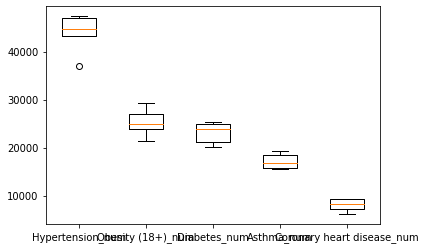

In [22]:
plt.boxplot(df4.sort_values(by=['total_registered_patients'],ascending=False).head(5).iloc[:,6:],labels=df4.columns[6:])

In [26]:
cases['highest_medical'] = df4.iloc[:,6:].idxmax(axis=1)[cases.index]
cases

,covid_19_deaths,covid_19_deaths_per_thousand,case_rate,highest_medical
Local authority,,,,
Kingston upon Thames,57,6.737526,0.032484,Hypertension_num
City of London,3,0.344590,0.034459,Hypertension_num
Camden,91,9.419626,0.034703,Hypertension_num
Islington,88,8.565254,0.036798,Hypertension_num
Richmond upon Thames,77,9.479668,0.039105,Hypertension_num
Wandsworth,132,15.180754,0.040432,Hypertension_num
Tower Hamlets,132,13.547523,0.041548,Hypertension_num
Hounslow,120,12.310915,0.044316,Hypertension_num
Bromley,152,17.852618,0.045908,Hypertension_num
